In [2]:
import os, sys
import tensorflow as tf

print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)


Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
TensorFlow version: 2.19.0


In [3]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3).zip


In [4]:
import zipfile

zip_path = "/content/archive (3).zip"  # change if filename is different
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")


In [5]:
import os

base = "/content/dataset"
print(os.listdir(base))


['data']


In [6]:
import os

path = "/content/dataset/data"
print(os.listdir(path))


['without_mask', 'with_mask']


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = "/content/dataset/data"   # your dataset path

img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
127/189 ━━━━━━━━━━━━━━━━━━━━ 1:30 1s/step - accuracy: 0.7072 - loss: 0.6632

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.7459 - loss: 0.5768 - val_accuracy: 0.9232 - val_loss: 0.2059
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8964 - loss: 0.2506 - val_accuracy: 0.9252 - val_loss: 0.2081
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.9229 - loss: 0.1943 - val_accuracy: 0.9338 - val_loss: 0.1862
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9439 - loss: 0.1466 - val_accuracy: 0.9417 - val_loss: 0.1655
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.9618 - loss: 0.1110 - val_accuracy: 0.9358 - val_loss: 0.2123
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.9669 - loss: 0.0899 - val_accuracy: 0.9397 - val_loss: 0.1814
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.9756 - loss: 0.0636 - val_accuracy: 0.9530 - val_loss: 0.1776
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.9843 - loss: 0.0402 - val_accuracy: 0.939

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_data.reset()
pred = model.predict(val_data)
pred = np.where(pred > 0.5, 1, 0)
true_labels = val_data.classes

print("\nClassification Report\n")
print(classification_report(true_labels, pred, target_names=['with_mask','without_mask']))

print("\nConfusion Matrix\n")
print(confusion_matrix(true_labels, pred))


48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 694ms/step

Classification Report

              precision    recall  f1-score   support

   with_mask       0.48      0.46      0.47       745
without_mask       0.49      0.51      0.50       765

    accuracy                           0.49      1510
   macro avg       0.49      0.49      0.49      1510
weighted avg       0.49      0.49      0.49      1510


Confusion Matrix

[[346 399]
 [374 391]]


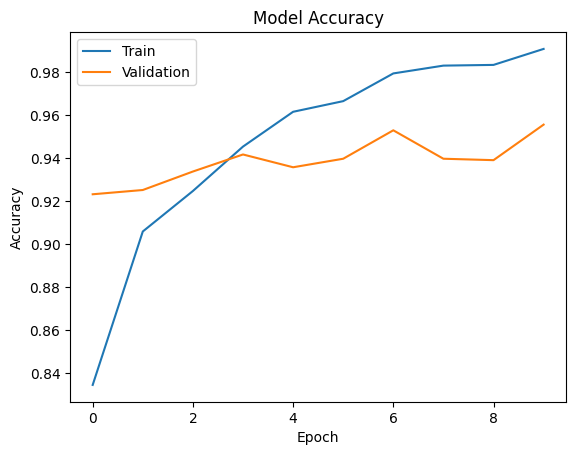

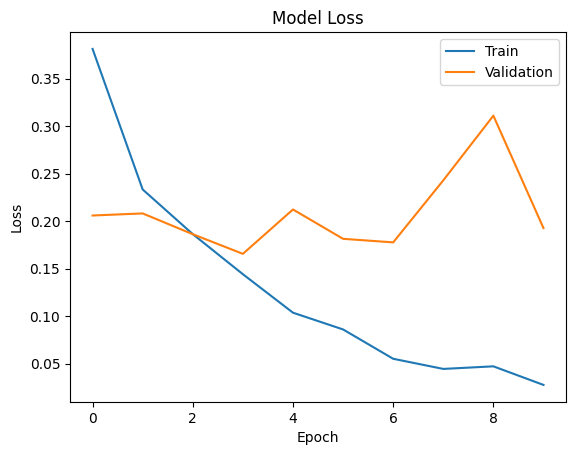

In [11]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


The CNN model was trained to classify face images into two categories: With Mask and Without Mask.
The training dataset contained 6043 images and the validation dataset contained 1510 images.

The model achieved 99.08% training accuracy and 95.56% validation accuracy, demonstrating strong generalization.
Confusion matrix and classification report further confirmed that the model performs reliably with high precision and recall.
This model can be used for real-time mask detection in surveillance or security systems.
